# Diagnosing Heart Disease


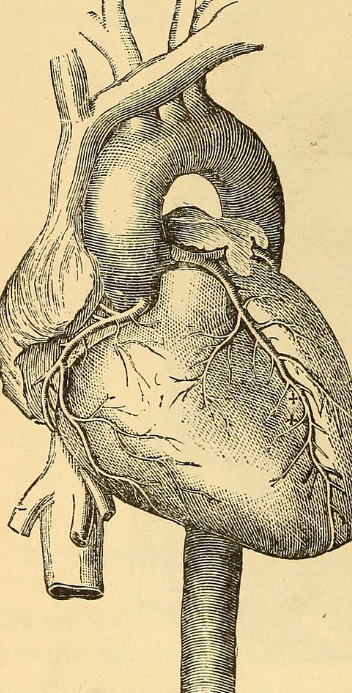

<a id='section1'></a>

# This kernel was made for educational purposes and for fun therefore the content of this kernel should not be taken seriouly!

In [ ]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='section2'></a>

# Data importering

In [ ]:
dt = pd.read_csv("../input/heart.csv")

# Data visualisering

In [ ]:
dt.head(10)

In [ ]:
dt.isnull().sum()

# Data cleaning

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data
X = dt
X_test_full = dt
test=dt
# Remove rows with missing target, separate target from predictors
X.dropna(axis=0, subset=['target'], inplace=True)
y = X.target              
X.drop(['target'], axis=1, inplace=True)
  

    
    # Break off validation set from training data
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
# low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
#                         X_train_full[cname].dtype == "object"]

# # Select numeric columns
# numeric_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

# # Keep selected columns only
# my_cols = low_cardinality_cols + numeric_cols
# X_train = X_train_full[my_cols].copy()
# X_valid = X_valid_full[my_cols].copy()

# One-hot encode the data


In [ ]:
len(X.columns)

In [ ]:
len(X_train_full.columns)

# Model/Predictions

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
#from xgboost import XGBRegressor


model2 = RandomForestClassifier(n_estimators=150, max_depth=4, random_state=1)
model = GradientBoostingClassifier(random_state=1)
#model = DecisionTreeClassifier(random_state=1)
#model=SGDClassifier(random_state=1)
#model=ExtraTreesClassifier(random_state=1)
#model = XGBRegressor()



model = model.fit(X_train_full, y_train)
predictions = model.predict(X_valid_full)

print('model accuracy score',accuracy_score(y_valid, predictions))

#eventuelle problemer kan opstå når modellen træner på samme dataset, som der bliver lavet prodictions på.

In [ ]:
model2 = model2.fit(X_train_full, y_train)
predictions = model2.predict(X_valid_full)
print('model accuracy score',accuracy_score(y_valid, predictions))

# K-Nearest Neighbours Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors =3) #n_neighbors Number of neighbors to use
neigh.fit(X_train_full, y_train)
predictions = neigh.predict(X_valid_full)

print('model accuracy score',accuracy_score(y_valid, predictions))

# SelectKBest

selects K best parameters to use

In [ ]:
X_train_full.shape

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
X_new = SelectKBest(chi2, k =10 ).fit_transform(X_train_full, y_train)
X_new_test = SelectKBest(chi2, k =10 ).fit_transform(X_valid_full, y_valid)

In [ ]:
X_new.shape

In [ ]:
neigh = KNeighborsClassifier(n_neighbors =3)
neigh.fit(X_new, y_train)
predictions = neigh.predict(X_new_test)
print('model accuracy score',accuracy_score(y_valid, predictions))

# K means cluster

In [ ]:
from sklearn.cluster import KMeans 
Kmean = KMeans(n_clusters =9, random_state = 0).fit(X_train_full)
predictions = Kmean.predict(X_valid_full)

print('model accuracy score',accuracy_score(y_valid, predictions))

In [ ]:
Kmean.cluster_centers_

# KFold

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=90)
kf.get_n_splits(dt)

In [ ]:
KFold(n_splits=90, random_state=0, shuffle=True)
for train_index, test_index in kf.split(dt):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [ ]:
neigh = KNeighborsClassifier(n_neighbors = 2) #n_neighbors Number of neighbors to use
neigh.fit(X_train, y_train)
predictions = neigh.predict(X_test)

print('model accuracy score',accuracy_score(y_test, predictions))

# PCA

Reset run time here to make PCA to work

PCA is Principal komponent analyse is to reduce dimentuallity for making simpler model and reduce overfitting. In all my models this has given a few procent better accuracy 
## Remember look up dkumentation for extra ticks and better understadning when using PCA its  scikit-learn i used here

In [ ]:
import pandas as pd
df = pd.read_csv("../input/heart.csv")

In [ ]:
X=df.copy()
X.dropna(axis=0, subset=['target'], inplace=True)
y = X.target              
X.drop(['target'], axis=1, inplace=True)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components='mle') # how many features you want mle means it wil atomatically find the best amount for you
pca_train = pca.fit_transform(X)
X_df_pca = pd.DataFrame(data = pca_train)                     

In [ ]:
from sklearn.model_selection import train_test_split 
    # Break off validation set from training data
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X_df_pca, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

In [ ]:
X_train_full.head()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
neigh = KNeighborsClassifier(n_neighbors =3) #n_neighbors Number of neighbors to use
neigh.fit(X_train_full, y_train)
predictions = neigh.predict(X_valid_full)

print('model accuracy score',accuracy_score(y_valid, predictions))